# Projet Python 2020 : Un GPS personnalisé pour les cyclistes
**Projet Python - 2A ENSAE** 

Fares Imane, Desbois Vinciane, Gajdos Romane 

## Introduction : 

**Nos objectifs :** Nous sommes parties des bases de données disponibles sur data.gouv et qui nous semblaient intéressantes d'un point de vue visualisation, manipulation et modélisation. Initialement nous voulions travailler sur l'intermodalité des moyens de transports verts. Mais les données disponibles ne nous permettaient pas de le faire. Nous avons finalement trouvé des données sur les aménagements cyclables en Ile-de-France et avons eu l'idée de faire un GPS pour vélo. 

**Le projet :** Nous avons dans un premier temps réalisé un travail de visualisation des données que nous allions utiliser pour le GPS : les aménagements cyclables, les stations de vélo en libre service et les accidents de vélo. Vinciane a ensuite découvert la bibliothèque Folium qui a grandement orienté notre travail. Nous avons laissé de côté la base aménagements cyclables pour utiliser les données OpenStreetMap via Folium. Les cartes obtenues correspondent davantage à un GPS : elles sont interactives et affichent la totalité des routes. Nous avons ensuite construit le GPS avec deux options principales : si l'utilisateur a son propre vélo ou s'il souhaite empreinter un vélo en libre service. Nous avons ensuite rajouté des options à notre GPS : un module de prévention concernant les accidents de vélo, un indicateur de congestion et un module météo en temps réel. 

## Les importations : 

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import os
import time
import datetime

In [3]:
import pyroutelib3
from pyroutelib3 import Router
import requests, json
import urllib.parse
import tempfile
import zipfile

In [4]:
import tkinter as tk
from tkinter import simpledialog
from tkinter import messagebox
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## I] Visualisation des données

### 1) Les pistes (Romane)

On représente les différents type d'aménagements cyclables en Ile-de-France, groupés en 7 catégories : bande cyclable, piste cyclable, tottoir, voie propre, voie verte, double sens cyclable non marqué. 

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


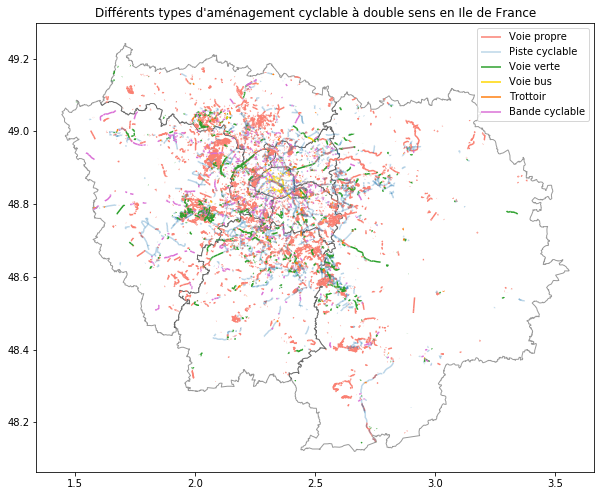

In [8]:
%run "./Visualisation_pistes.ipynb"

### 2) Les vélos en libre-service (Imane)

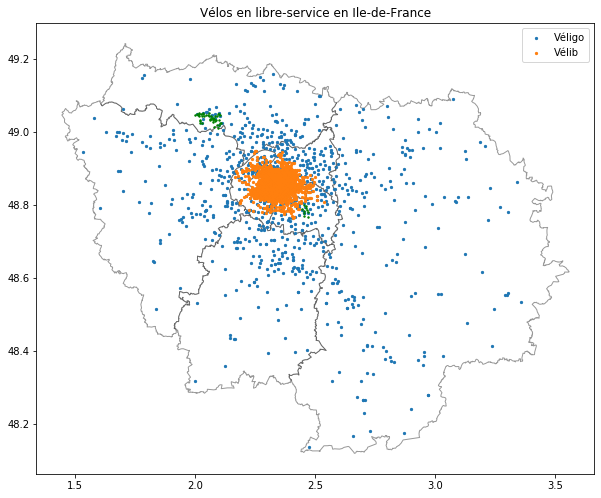

In [17]:
%run "./Visualisation_velos.ipynb"

### 3) Un GPS qui prend en compte les accidents

## II] Personnalisation du GPS

### 1) Un GPS qui prend en compte les accidents (Vinciane)

C:\Users\Vinciane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Le nombre de clusters est de 63
Le nombre d'accidents qui rentrent dans les clusters est de  215


./velo_paris.ipynb:4: RuntimeWarning: Mean of empty slice.
  "cell_type": "markdown",
C:\Users\Vinciane\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


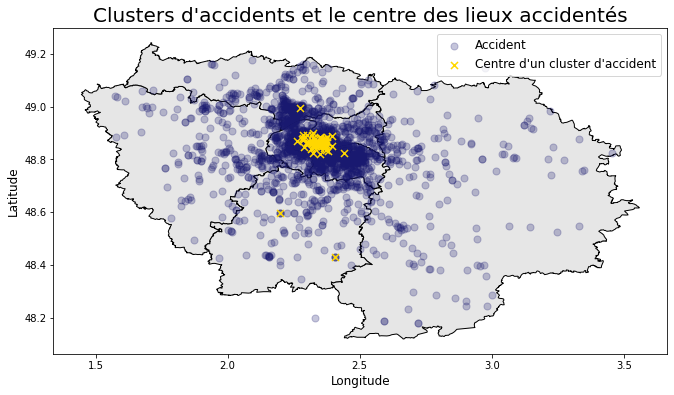

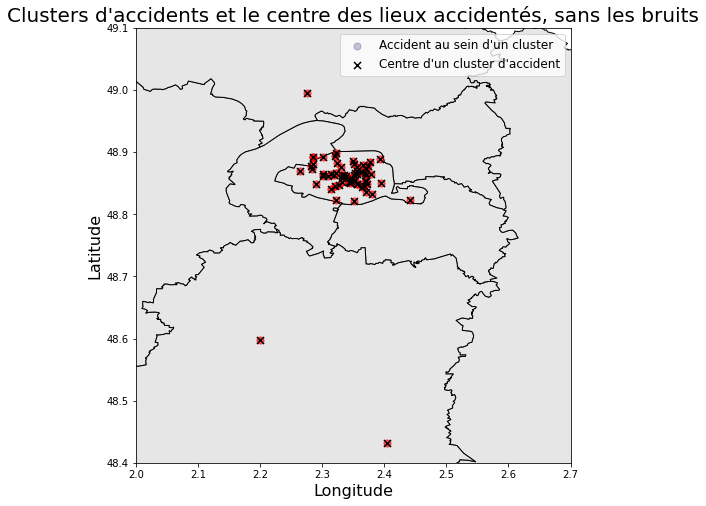

In [9]:
%run "./velo_paris.ipynb"

In [10]:
#Carte qui indique la localisation des accidents dans toute l'Ile-de-France en fonction de la gravité de l'accident
map_accident 

### 2) Un GPS qui informe sur les conditions météréologiques (Vinciane)

Aujourd'hui nous sommes le 13-12-2020
Il est 19:24 heure attention, vous roulez de nuit.


C:\Users\Vinciane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
./prolongement_meteo.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cell_type": "markdown",
./prolongement_meteo.ipynb:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ]
./prolongement_meteo.ipynb:1: FutureWarning: `item` has been deprecated and will

Quel chanceux, il n'y a ni pluie ni verglas pour votre trajet à vélo.
Pourtant, il faut quand même faire attention, car de nombreux accidents ont lieu dans des conditions atmosphériques normales.


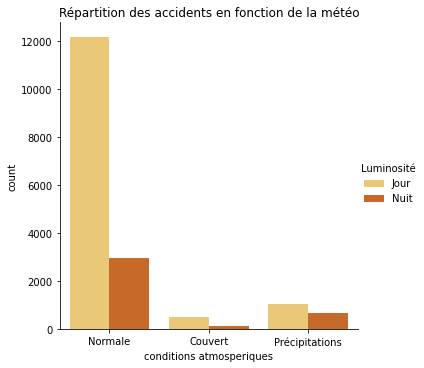

In [11]:
%run "./prolongement_meteo.ipynb"

### 3)  Un GPS qui prend en compte les affluences (Romane)

On utilise les données issues des compteurs installés à Paris (data.gouv). On ignore les variations saisonnières (mois) et hebdomadaires. On ne considère que les variations en fonction des jours de la semaine : un rapide plot montre deux groupes très distincts de moyennes horaire : les jours de la semaine et les jours du week-end. On crée un indice de congestion des pistes cyclables en fonction du jour et de l'heure de la requêtes.  L'indice calculé correspond à la moyenne sur 2019 et 2020 des comptages de chaque compteur au jour de la semaine et à l'heure de la requête. 

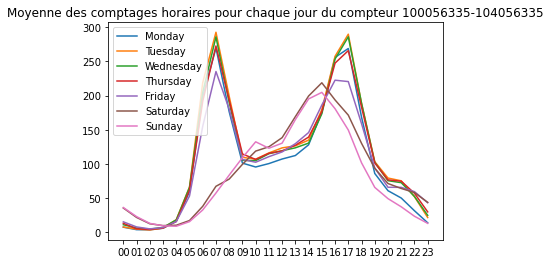

2710711480
411736456
votre trajet existe


In [15]:
%run "./compteurs.ipynb"

A modifier : ici on affiche déjà un trajet et les compteurs les plus proches. Peut-être qu'on peut afficher ici tous les compteurs et seulement dans la partie finale afficher les compteurs autour du trajet ? 

In [14]:
idf

## III] Utilisation du GPS (Imane)

In [18]:
%run "./GPS.ipynb"

D'où partez-vous ? (numéro, rue, code postal ville) 5, Avenue Anatole France, 75007 Paris
Où voulez-vous aller ? (numéro, rue, code postal ville) 1, Rue de Rivoli, 75001 Paris
Avez-vous votre propre vélo ? Entrez 'oui' ou 'non'  non


Station la plus proche du point de départ : Bourdonnais - Tour Eiffel

 
 Un vélo est disponible à la station la plus proche du point de départ

 
Distance à effectuer à pied (point de départ -> station de départ) : 0.23 km
soit un temps de trajet d'environ : 3 minutes
 

Station la plus proche du point d arrivée :  Saint-Honoré - Musée du Louvre

 Un dock est disponible à la station la plus proche du point d'arrivée

 
Distance à effectuer en vélo (station de départ -> station d'arrivée) : 3.94 km
soit un temps de trajet d'environ : 16 minutes


 Distance à effectuer à pied (station d'arrivée -> point d'arrivée) : 0.13 km
soit un temps de trajet d'environ : 2 minutes
 

Le temps total du trajet est donc de : 21 minutes
 



In [19]:
idf

### Signalement de la part de l'utilisateur après le trajet

In [20]:
a=input("Suite à votre trajet, souhaitez-vous signaler quelque chose ? Entrez 'oui' ou 'non'")

if(a=='oui'):
    x=input("Que souhaitez-vous signaler ?")
    print("Cliquez à l'endroit correspondant sur la carte")
    
print("Merci de contribuer à l'amélioration notre application!")

idf.add_child(folium.ClickForMarker(popup=x))

Suite à votre trajet, souhaitez-vous signaler quelque chose ? Entrez 'oui' ou 'non' oui
Que souhaitez-vous signaler ? Accident


Cliquez à l'endroit correspondant sur la carte
Merci de contribuer à l'amélioration notre application!


## III] Pistes non abouties

1) piste initiale portait sur le covoiturage mais il n'y avait aucune données disponibles sur les flux, les seules données disponibles étaient les aires de covoiturage et leur capacité.

2) compteurs : prédiction de la congestion avec sklearn plutôt que simple utilisation des moyennes sur les années passées  

3) analyse de la corrélation entre pluie et nombre d'accidents : les données météo n'étaient pas disponibles gratuitement

4) modification de la fonction Router de folium ou création d'une nouvelle fonction pour créer un GPS vélo qui ne cherche pas le trajet le plus rapide mais le plus agréable (en mettant plus de poids sur les voies vertes, les zones sans accidents,... par ex), sous réserve d'une perte raisonnable de temps. Mais après plusieurs tests, la fonction Router semblait faire un bon compromis entre rapidité et confort du trajet (réelle différence du trajet par rapport à un trajet requêté avec l'option "car"). De plus, modifier une fonction déjà existente semblait plus compliqué que prévu, malgré des conseils avisés,... 